**What features make a hit song?**

**An analysis of three decades of music using data from Spotify**

Spotify’s web API can be used to create a dataset of songs and their features, including the songs popularity. Using data analytics and a dataset from Kaggle, I determined which song features can be used to predict “hits”. Songs were analyzed from three decades: 1990’s, 2000’s, and 2010’s, to determine which song features create hits and whether these features change over time. For more information about what Spotify's song features are go to this website: https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-tracks.

Start by importing libraries and CSV files.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,5)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


nineties = pd.DataFrame(pd.read_csv('the-spotify-hit-predictor-dataset/dataset-of-90s.csv')) #Spotify dataset of all songs from the nineties
aughts = pd.DataFrame(pd.read_csv('the-spotify-hit-predictor-dataset/dataset-of-00s.csv'))  #Spotify dataset of all songs from the 2000's
tens = pd.DataFrame(pd.read_csv('the-spotify-hit-predictor-dataset/dataset-of-10s.csv'))  #Spotify dataset of all songs from the 2010's


**Data Organizing and Cleaning**

Add a column for year into all dfs before combining all the CSV files.

In [2]:
nineties['decade'] = 1990
aughts['decade'] = 2000
tens['decade'] = 2010

Create a combined CSV file of the past three decades.

In [3]:
all_dfs = [nineties, aughts, tens]
all_songs = pd.concat(all_dfs) #combines all the decade dataframes
print(all_songs['decade'].unique()) #check that the new dataframe has all the decades

[1990 2000 2010]


In [4]:
all_songs.to_csv('all_songs.csv', index = False) #create a CSV file of the new dataframe
all_songs.head(3)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0,1990
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1,1990
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0,1990


Check for nulls to determine if you need to clean the data.

In [5]:
pd.isnull(all_songs).sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decade              0
dtype: int64

No nulls, so data looks good.

Check the columns of the dataframe to determine the names of the variables to be analyzed and create a list of variables.

In [6]:
all_songs.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'decade'],
      dtype='object')

In [7]:
#create two var lists, one with Spotify's features (spfeatures_var_list) and one with the song traits (song_traits_var_list)
spfeatures_var_list = ['danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 
                       'instrumentalness', 'liveness','valence']
song_traits_var_list = ['key', 'loudness','tempo', 'time_signature', 'chorus_hit','sections'] 
#duration_ms has been removed since it has such larger numbers than the other variables

**Descriptive Statistics**

In [8]:
all_songs.describe() #show the descriptive statistics of the variables of all the songs in all decades

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
count,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.00000,1.779000e+04,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000
mean,0.559440,0.656260,5.274817,-8.364215,0.652839,0.088697,0.239137,0.158870,0.196671,0.485603,121.01916,2.498424e+05,3.922709,40.922312,10.812760,0.500000,2000.493536
std,0.187818,0.246307,3.562926,5.305503,0.476081,0.092549,0.307601,0.308722,0.167451,0.255318,29.88302,1.117143e+05,0.379259,19.909212,4.738156,0.500014,8.170243
min,0.057600,0.000251,0.000000,-49.253000,0.000000,0.022000,0.000000,0.000000,0.013000,0.000000,34.53500,1.592000e+04,0.000000,0.000000,1.000000,0.000000,1990.000000
25%,0.437000,0.505000,2.000000,-9.911000,0.000000,0.035700,0.008810,0.000000,0.093600,0.278000,97.16900,2.000468e+05,4.000000,27.884680,8.000000,0.000000,1990.000000
50%,0.577000,0.700000,5.000000,-6.902000,1.000000,0.050400,0.081600,0.000046,0.128000,0.487000,119.87800,2.334570e+05,4.000000,36.258675,10.000000,0.500000,2000.000000
75%,0.697000,0.857000,8.000000,-5.028000,1.000000,0.096700,0.377000,0.061500,0.257000,0.690000,140.00075,2.766830e+05,4.000000,48.306250,12.000000,1.000000,2010.000000
max,0.986000,0.999000,11.000000,1.137000,1.000000,0.956000,0.996000,0.998000,0.992000,0.996000,217.94300,4.170227e+06,5.000000,262.615400,169.000000,1.000000,2010.000000


Compare the means for Spotify's song features for hit songs and flop songs.

In [9]:
#going to focus on the spotify features when comparing the hits and flops
all_songs_hits = all_songs[spfeatures_var_list].loc[all_songs['target'] == 1]
all_songs_flops = all_songs[spfeatures_var_list].loc[all_songs['target'] == 0]

In [10]:
#create a dataframe that includes the means for hits and flops
hits_means = pd.DataFrame(all_songs_hits.describe().loc['mean'])
flops_means = pd.DataFrame(all_songs_flops.describe().loc['mean'])
means_joined = pd.concat([hits_means,flops_means], axis = 1)
means_joined.columns = ['hit_mean', 'flop_mean']

means_joined

,hit_mean,flop_mean
danceability,0.640024,0.478857
energy,0.685306,0.627215
key,5.335020,5.214615
loudness,-6.631530,-10.096899
mode,0.670826,0.634851
speechiness,0.095196,0.082198
acousticness,0.159774,0.318499
instrumentalness,0.014353,0.303387
liveness,0.183355,0.209987
valence,0.540854,0.430352


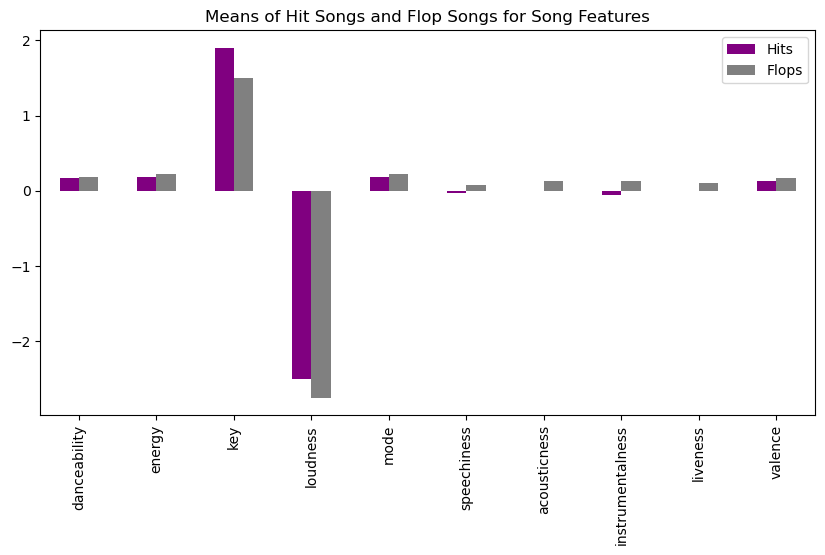

In [11]:
#going to scale the dataframe to make the graph more readable
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
means_joined_scaled = pd.DataFrame(ss.fit_transform(means_joined),index= means_joined.index, columns = means_joined.columns)
means_joined_scaled


means_joined_scaled.plot(kind = 'bar', figsize=(10, 5), color = ('purple', 'grey'), title = 'Means of Hit Songs and Flop Songs for Song Features')
plt.legend(labels=['Hits', 'Flops'], loc='upper right')
plt.show()
plt.show()

Judging by the differences in the means between hits and flops, there does appear to be a difference between the two types of songs. This means we could possibly create a model to predict hits and flops based on song features.

**Exploratory Data Analysis**

More information could be gleaned from histograms and boxplots than just means.

**Histograms**

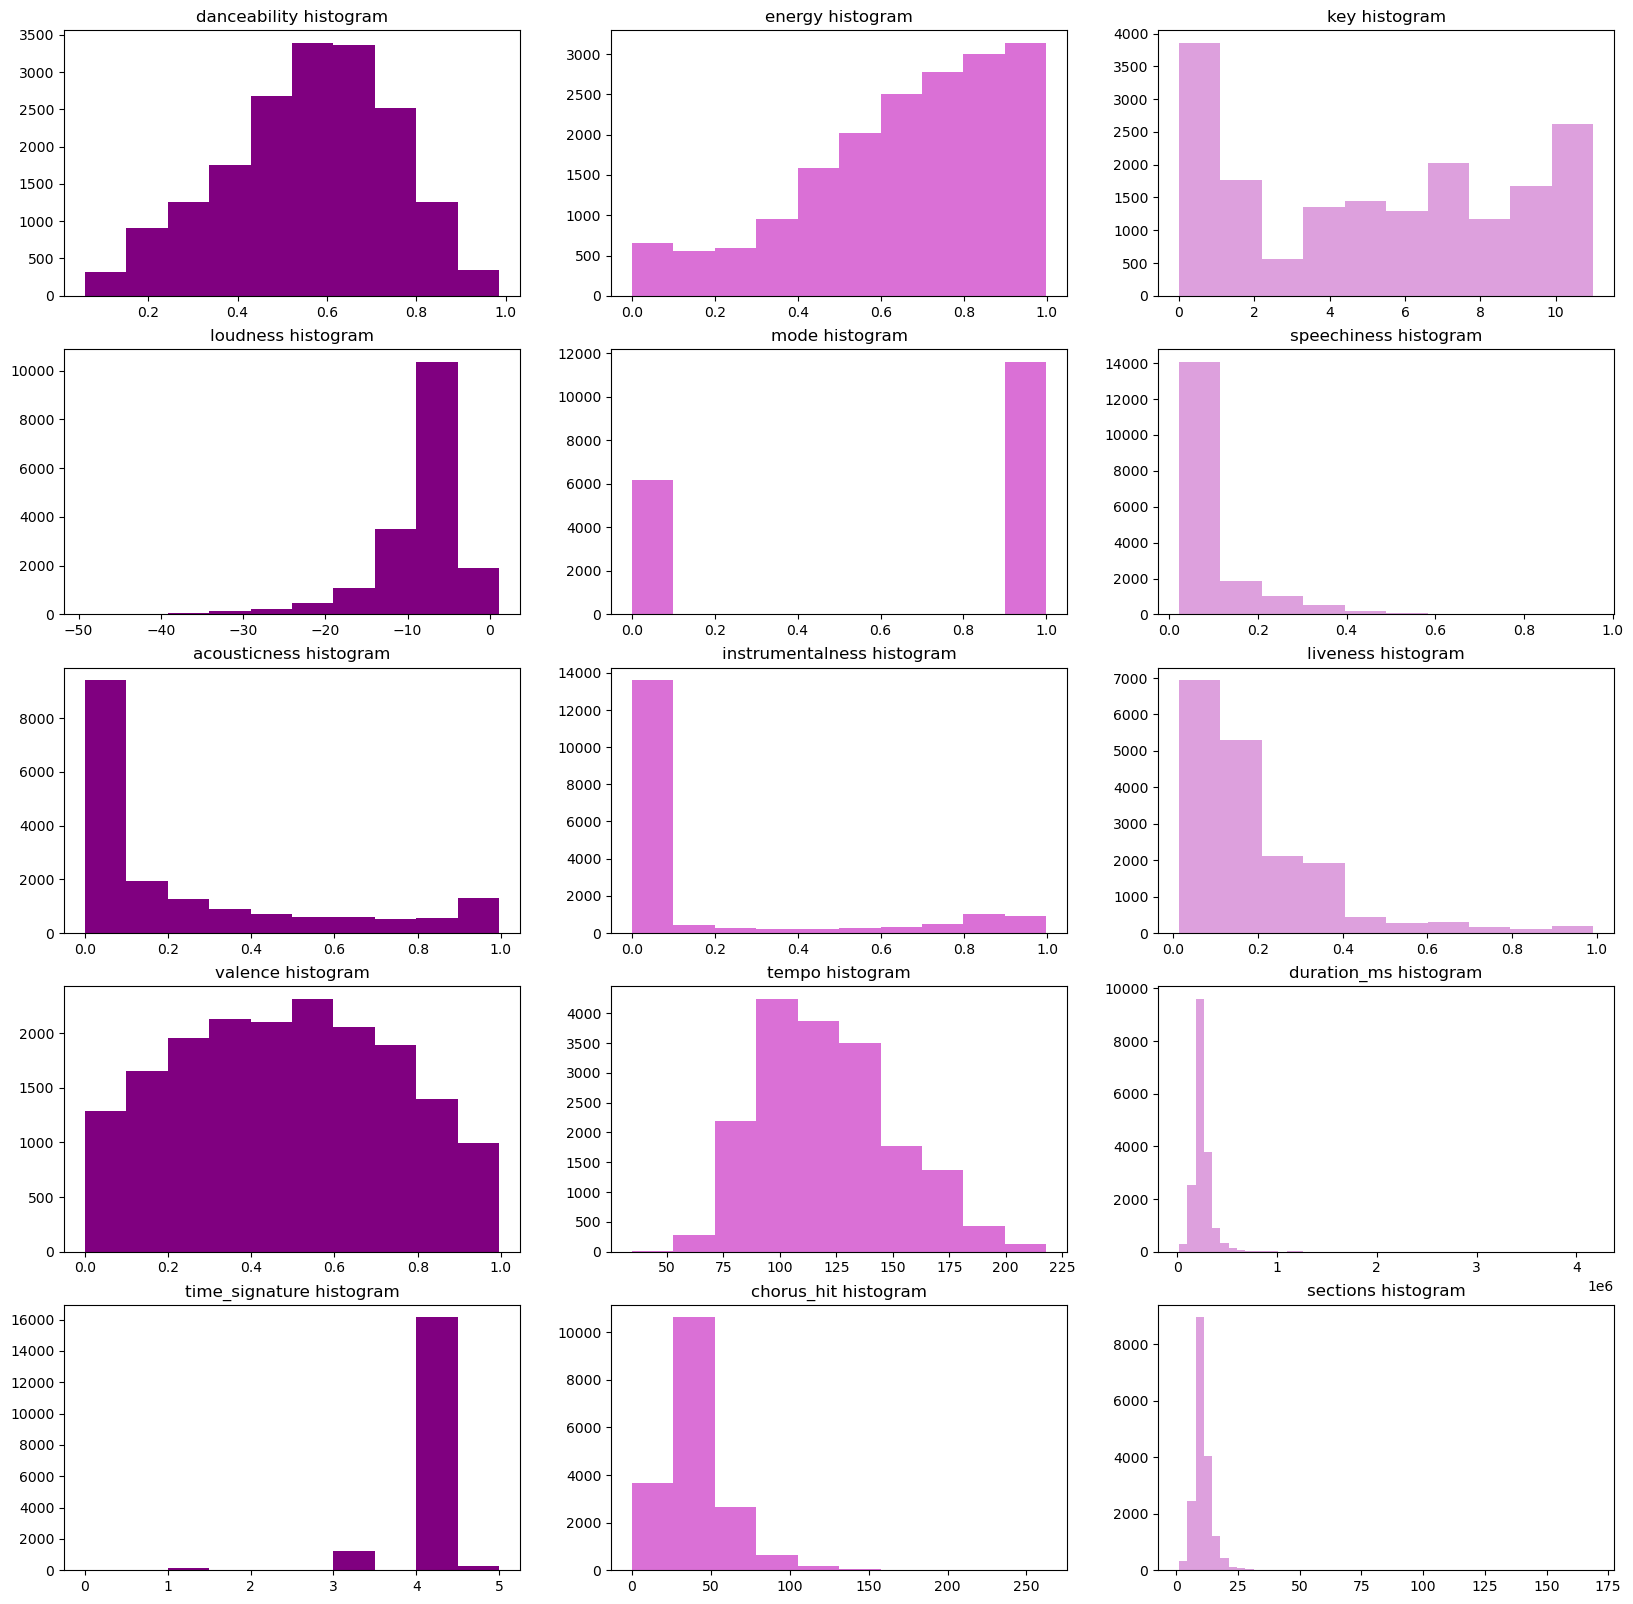

In [12]:
#create histograpms of all the variables to see distributions
fig, ax = plt.subplots(5,3, figsize=(20,20))

def hist_plot(row, column, variable, binsnum, color):
    ax[row, column].hist(all_songs[variable], bins = binsnum, color = color)
    ax[row, column].set_title(variable + ' histogram')
    
hist_plot(0, 0, 'danceability', 10, 'purple')
hist_plot(0, 1, 'energy', 10, 'orchid')
hist_plot(0, 2, 'key', 10, 'plum')
hist_plot(1,0, 'loudness', 10, 'purple')
hist_plot(1,1, 'mode', 10, 'orchid')
hist_plot(1,2, 'speechiness', 10, 'plum')
hist_plot(2,0, 'acousticness', 10, 'purple')
hist_plot(2,1, 'instrumentalness', 10, 'orchid')
hist_plot(2,2, 'liveness', 10, 'plum')
hist_plot(3,0, 'valence', 10, 'purple')
hist_plot(3,1, 'tempo', 10, 'orchid')
hist_plot(3,2, 'duration_ms', 50, 'plum')
hist_plot(4,0, 'time_signature', 10, 'purple')
hist_plot(4,1, 'chorus_hit', 10, 'orchid')
hist_plot(4,2, 'sections', 50, 'plum')

plt.show()

Some interesting patterns here - songs tend to be more danceable than less danceable, songs tend to have more energy than less energy, the key of C is the most popular key, songs tend to be under 10 decibels, most songs are in major scales, most songs contain more music than speech, most songs are not live, most songs are not acoustic, most songs contain music, there's a good mix of happy and sad songs, most songs are about 80-90 beats per minute, and most songs are in 4/4 time.

**Boxplots**

Let's create some boxplots to see the spread of the song features and any differences between hits and flops.

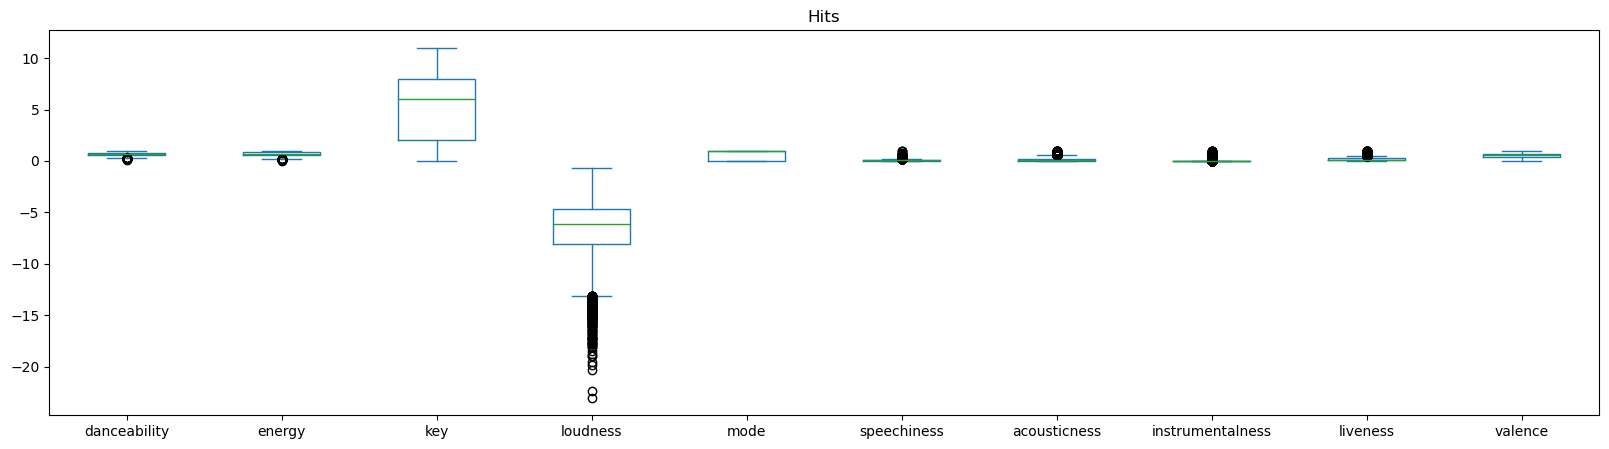

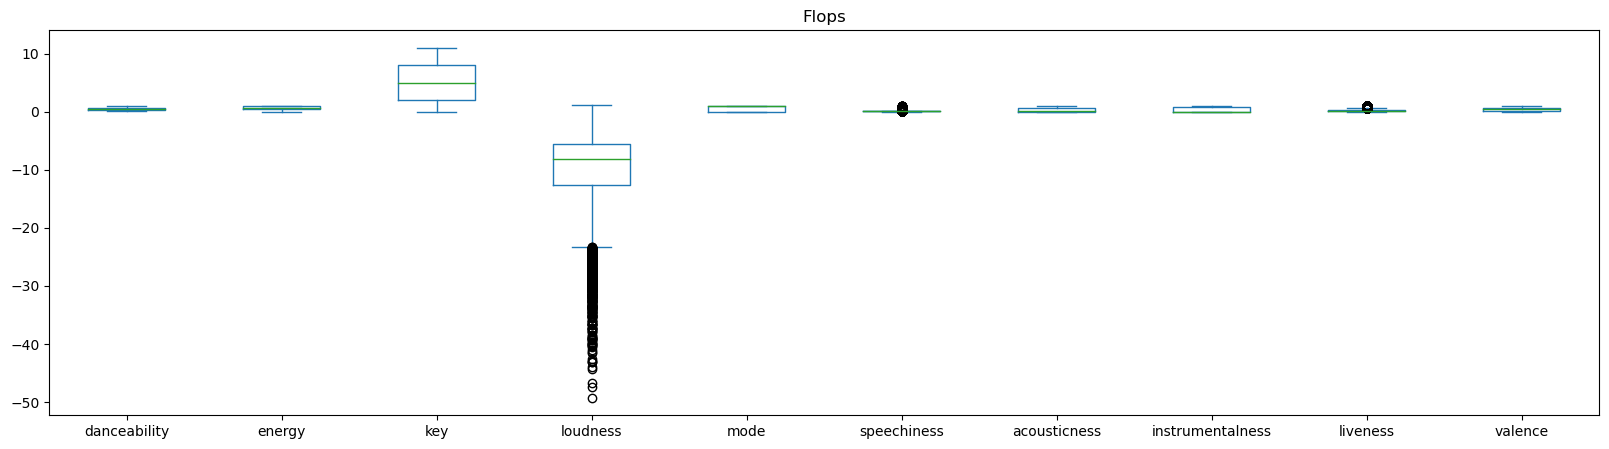

In [13]:
#to create more readable graphs, I created two boxplots, one with the first 10 song features
mpl.rcParams['figure.figsize']=(20,5)
all_songs[all_songs['target']==1].iloc[:, 0:13].plot(kind='box', title = 'Hits')
plt.show()
all_songs[all_songs['target']==0].iloc[:, 0:13].plot(kind='box', title = 'Flops')
plt.show()

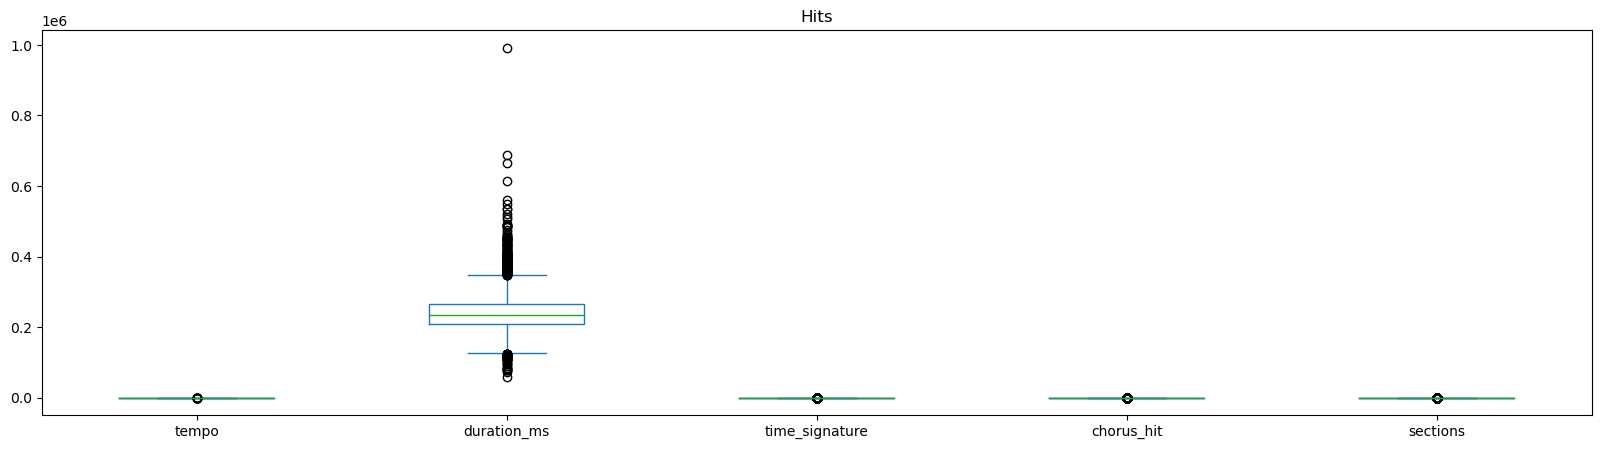

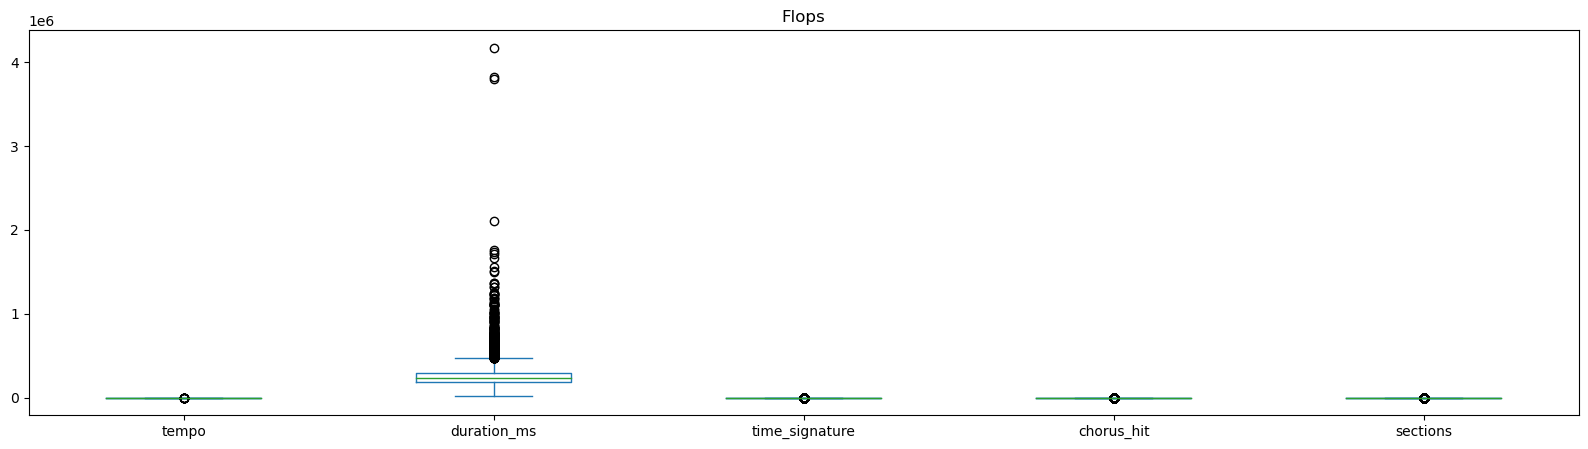

In [14]:
#...and one with the last 5 song features
all_songs[all_songs['target']==1].iloc[:, 13:18].plot(kind='box', title = 'Hits')
plt.show()
all_songs[all_songs['target']==0].iloc[:, 13:18].plot(kind='box', title = 'Flops')
plt.show()

Since I didn't scale the dataset, it is a bit hard to see the boxplots of some of the song features. Overall, however, there does appear to be a difference between hit and flop songs. This leads me to the next part of the analysis.

**Inferential Statistics**



**Random Forest Classifier**
Create model to determine if hit songs can be determined for all three decades combined using a Random Forest Classifier.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

indep_columns = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']

X = all_songs[indep_columns]
y = all_songs['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) #use 75% of the data for training the model and 25% of the model for testing
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [16]:
#create a confusion matrix to see the efficacy of the model
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1788,  398],
       [ 292, 1970]], dtype=int64)

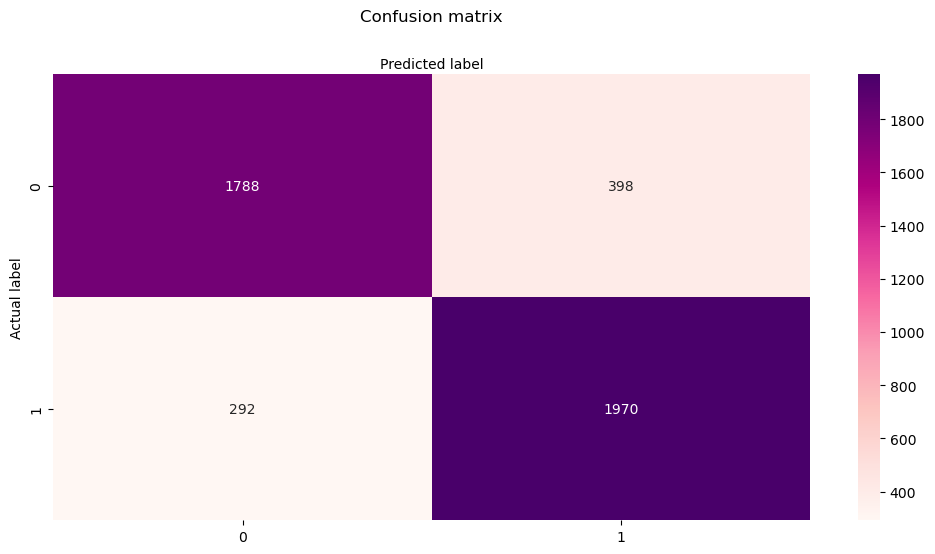

In [17]:
#create a figure/heatmap of the confusion matrix for a better visual
mpl.rcParams['figure.figsize']=(10,5)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The confusion matrix demonstrates that the model correctly identified hits and flops most of the time.

In [18]:
#create a dataframe of the feature importances to determine which variables are the most important in determining a hit
all_songs_feat = RF.feature_importances_
df_indep_columns = pd.DataFrame(indep_columns)
df_all_songs_feat = pd.DataFrame(all_songs_feat)
all_songs_feat_vars = pd.concat([df_indep_columns, df_all_songs_feat], axis = 1)
all_songs_feat_vars.columns = ['Variable', 'Feature importance all decades']
all_songs_feat_vars = all_songs_feat_vars.set_index('Variable')
all_songs_feat_vars = all_songs_feat_vars.sort_values(by=['Feature importance all decades'], ascending = False)
all_songs_feat_vars
all_songs_feat_vars.to_csv('all_songs_feat.csv', index = False) #create a CSV file of the new dataframe

In [19]:
all_songs_feat_vars

,Feature importance all decades
Variable,
instrumentalness,0.215619
danceability,0.124177
acousticness,0.106291
duration_ms,0.082463
energy,0.081244
loudness,0.079633
valence,0.064182
speechiness,0.053116
tempo,0.044045


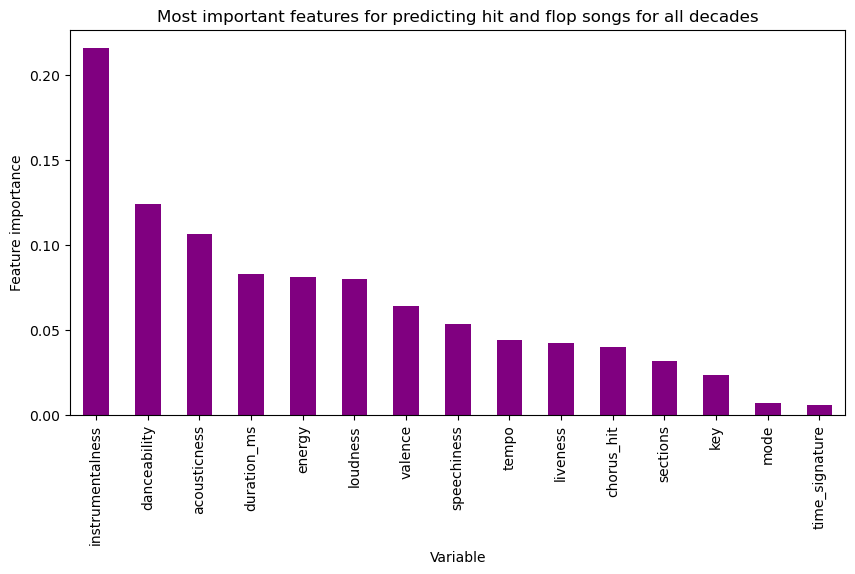

In [20]:
all_songs_feat_vars.plot(kind='bar', color = "purple", title = "Most important features for predicting hit and flop songs for all decades", legend = None)
plt.ylabel('Feature importance')
plt.show()

For all decades, instrumentalness, danceability, acousticness, duration_ms, and loudness were the greatest predictors of if a song was a hit.

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8448741007194245
Precision: 0.8319256756756757
Recall: 0.8709106984969054


The model is highly accurate, precise, and has good recall.


**Decade: 1990's**
Let's repeat the model but specifically for songs in the 1990's.

In [22]:
X = nineties[indep_columns]
y = nineties['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[560, 136],
       [ 99, 585]], dtype=int64)

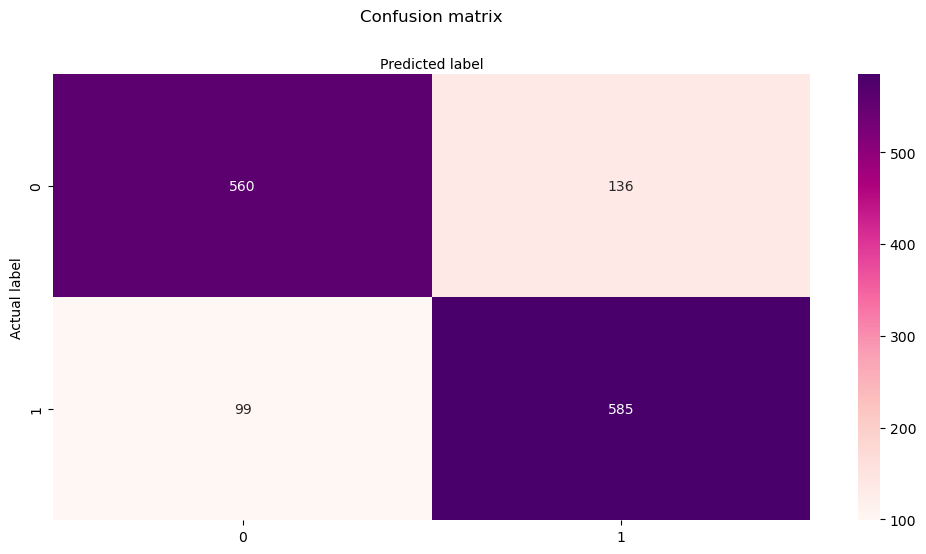

In [23]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Once again, the confusion matrix demonstrates that the model is very good at predicting hits and flops.

In [24]:
nineties_feat = RF.feature_importances_
df_indep_columns = pd.DataFrame(indep_columns)
df_nineties_feat = pd.DataFrame(nineties_feat)
nineties_feat_vars = pd.concat([df_indep_columns, df_nineties_feat], axis = 1)
nineties_feat_vars.columns = ['Variable', 'Feature importance 1990s']
nineties_feat_vars = nineties_feat_vars.set_index('Variable')
nineties_feat_vars = nineties_feat_vars.sort_values(by=['Feature importance 1990s'], ascending = False)
nineties_feat_vars
nineties_feat_vars.to_csv('nineties_feat_vars.csv', index = False) #create a CSV file of the new dataframe

In [25]:
nineties_feat_vars

,Feature importance 1990s
Variable,
instrumentalness,0.143884
danceability,0.139412
duration_ms,0.134408
acousticness,0.125638
loudness,0.071416
energy,0.069531
speechiness,0.061050
valence,0.056708
liveness,0.044283


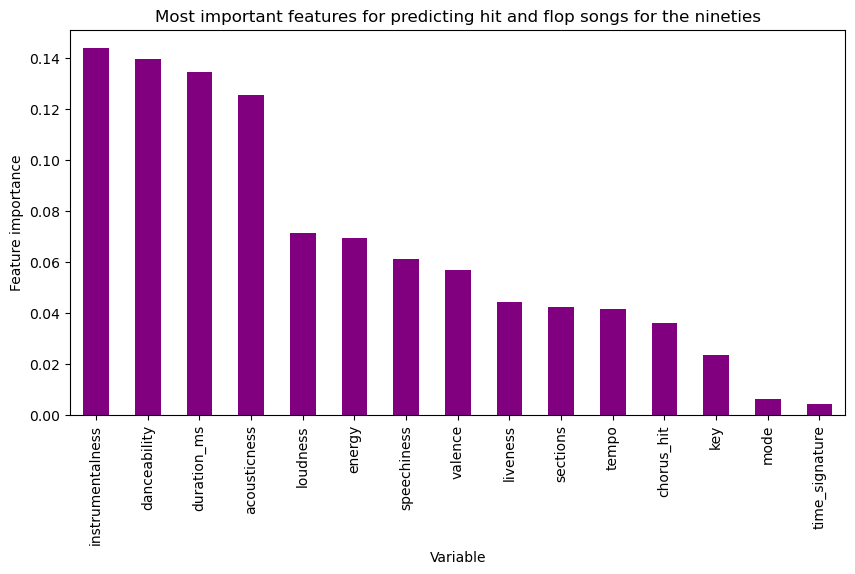

In [26]:
nineties_feat_vars.plot(kind='bar', color = "purple", title = "Most important features for predicting hit and flop songs for the nineties", legend = None)
plt.ylabel('Feature importance')
plt.show()

Hit and flop songs in the 90's were predicted mostly by instrumentalness, duration, danceability, acousticness and energy.

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8297101449275363
Precision: 0.811373092926491
Recall: 0.8552631578947368


The model also had high accuracy, precision, and recall for the 90's.


**Decade: The 2000's**
Repeat the model for songs from the 2000's.

In [28]:
X = aughts[indep_columns]
y = aughts['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[613, 115],
       [ 98, 642]], dtype=int64)

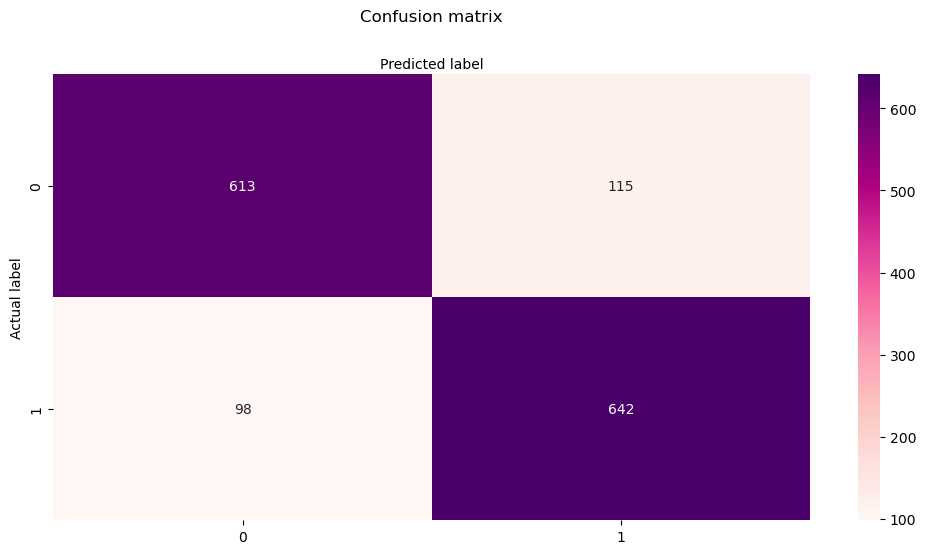

In [29]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Once again, the confusion matrix demonstrates that the model is very good at predicting hits and flops.

In [30]:
aughts_feat = RF.feature_importances_
df_indep_columns = pd.DataFrame(indep_columns)
df_aughts_feat = pd.DataFrame(aughts_feat)
aughts_feat_vars = pd.concat([df_indep_columns, df_aughts_feat], axis = 1)
aughts_feat_vars.columns = ['Variable', 'Feature importance 2000s']
aughts_feat_vars = aughts_feat_vars.set_index('Variable')
aughts_feat_vars = aughts_feat_vars.sort_values(by=['Feature importance 2000s'], ascending = False)
aughts_feat_vars
aughts_feat_vars.to_csv('aughts_feat_vars.csv', index = False) #create a CSV file of the new dataframe

In [31]:
aughts_feat_vars

,Feature importance 2000s
Variable,
instrumentalness,0.219563
danceability,0.122921
duration_ms,0.100696
acousticness,0.095819
loudness,0.091014
energy,0.074046
valence,0.064912
speechiness,0.051686
tempo,0.039205


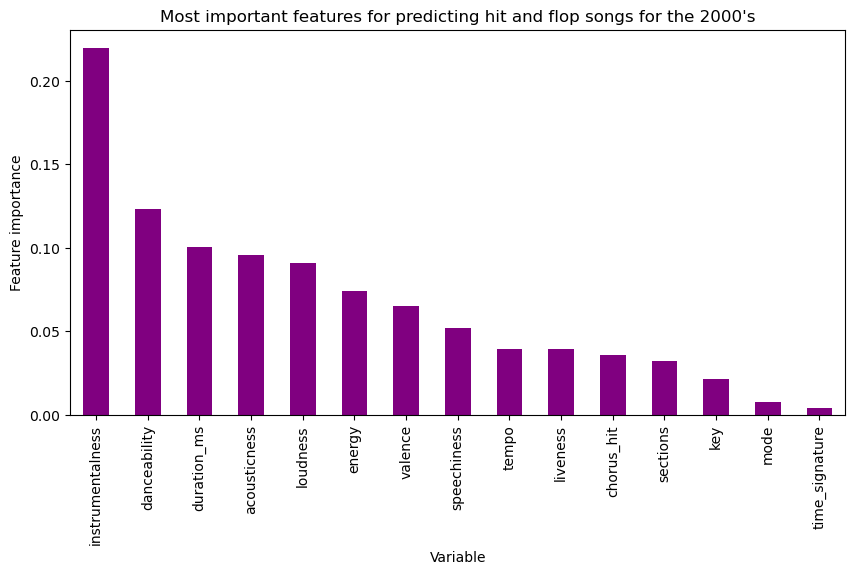

In [32]:
aughts_feat_vars.plot(kind='bar', color = "purple", title = "Most important features for predicting hit and flop songs for the 2000's", legend = None)
plt.savefig('aughts_feature_importance_bar.jpg')
plt.ylabel('Feature importance')
plt.show()

In the 2000's hit and flop songs were mostly predicted by instrumentalness, danceability, loudness, duration, and acousticness.

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8549046321525886
Precision: 0.8480845442536328
Recall: 0.8675675675675676


The model has high accuracy, precision and recall, indicating it is good at classifying hit and flop songs.


**Decade: The 2010's**
Repeat the model for songs from the 2010's.

In [34]:
X = tens[indep_columns]
y = tens['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[632, 137],
       [105, 726]], dtype=int64)

In [35]:
RF.feature_importances_ #corresponds to the order of the variables

array([0.09772265, 0.08749391, 0.02455114, 0.10254268, 0.00598316,
       0.04767676, 0.09490515, 0.24784387, 0.03953545, 0.06959557,
       0.04123833, 0.06598577, 0.00679968, 0.04047925, 0.02764662])

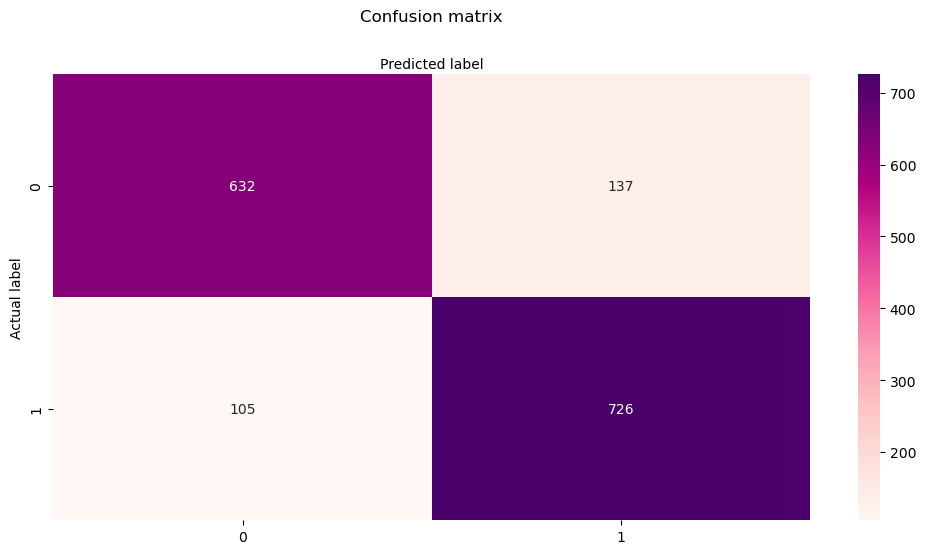

In [36]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Once again, the confusion matrix demonstrates that the model is very good at predicting hits and flops.

In [37]:
tens_feat = RF.feature_importances_
df_indep_columns = pd.DataFrame(indep_columns)
df_tens_feat = pd.DataFrame(tens_feat)
tens_feat_vars = pd.concat([df_indep_columns, df_tens_feat], axis = 1)
tens_feat_vars.columns = ['Variable', 'Feature importance 2010s']
tens_feat_vars = tens_feat_vars.set_index('Variable')
tens_feat_vars = tens_feat_vars.sort_values(by=['Feature importance 2010s'], ascending = False)
tens_feat_vars
tens_feat_vars.to_csv('tens_feat_vars.csv', index = False) #create a CSV file of the new dataframe

In [38]:
tens_feat_vars

,Feature importance 2010s
Variable,
instrumentalness,0.247844
loudness,0.102543
danceability,0.097723
acousticness,0.094905
energy,0.087494
valence,0.069596
duration_ms,0.065986
speechiness,0.047677
tempo,0.041238


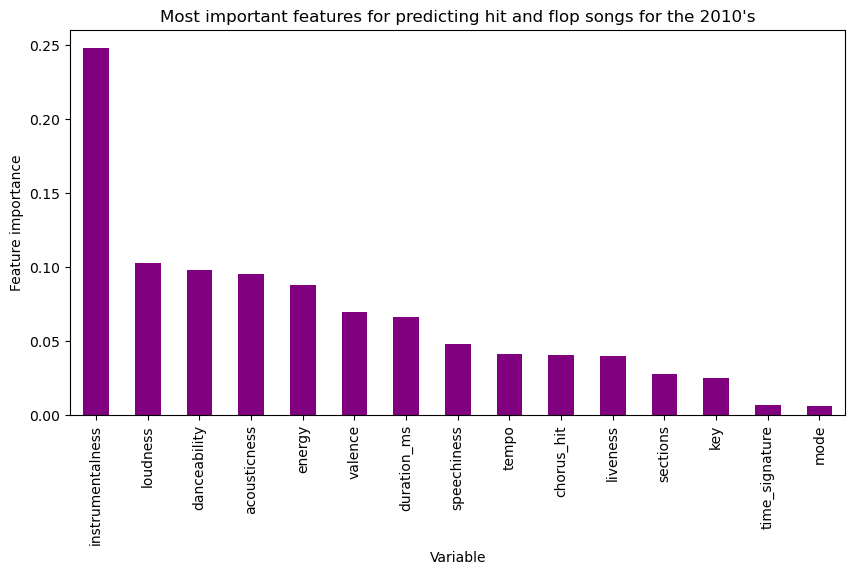

In [39]:
tens_feat_vars.plot(kind='bar', color = "purple", title = "Most important features for predicting hit and flop songs for the 2010's", legend = None)
plt.ylabel('Feature importance')
plt.show()

Hit and flop songs of the 2010's were most influenced by instrumentalness, loudness, acousticness, danceability and energy.

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.84875
Precision: 0.8412514484356894
Recall: 0.8736462093862816


The model has high accuracy, precision and recall, indicating it is good at classifying hit and flop songs.



**Has feature importance changed through time?**
From our previous models, it's apparent that feature importance has changed through time. Let's graph the results to show that visually.

In [41]:
compare_feats = all_songs_feat_vars + nineties_feat_vars + aughts_feat_vars + tens_feat_vars
compare_feats_df = pd.concat([all_songs_feat_vars, nineties_feat_vars, aughts_feat_vars, tens_feat_vars], axis = 1)
compare_feats_df
compare_feats_df.to_csv('compare_feats_df.csv') #create a CSV file of the new dataframe

In [42]:
compare_feats_df

,Feature importance all decades,Feature importance 1990s,Feature importance 2000s,Feature importance 2010s
Variable,,,,
instrumentalness,0.215619,0.143884,0.219563,0.247844
danceability,0.124177,0.139412,0.122921,0.097723
acousticness,0.106291,0.125638,0.095819,0.094905
duration_ms,0.082463,0.134408,0.100696,0.065986
energy,0.081244,0.069531,0.074046,0.087494
loudness,0.079633,0.071416,0.091014,0.102543
valence,0.064182,0.056708,0.064912,0.069596
speechiness,0.053116,0.061050,0.051686,0.047677
tempo,0.044045,0.041377,0.039205,0.041238


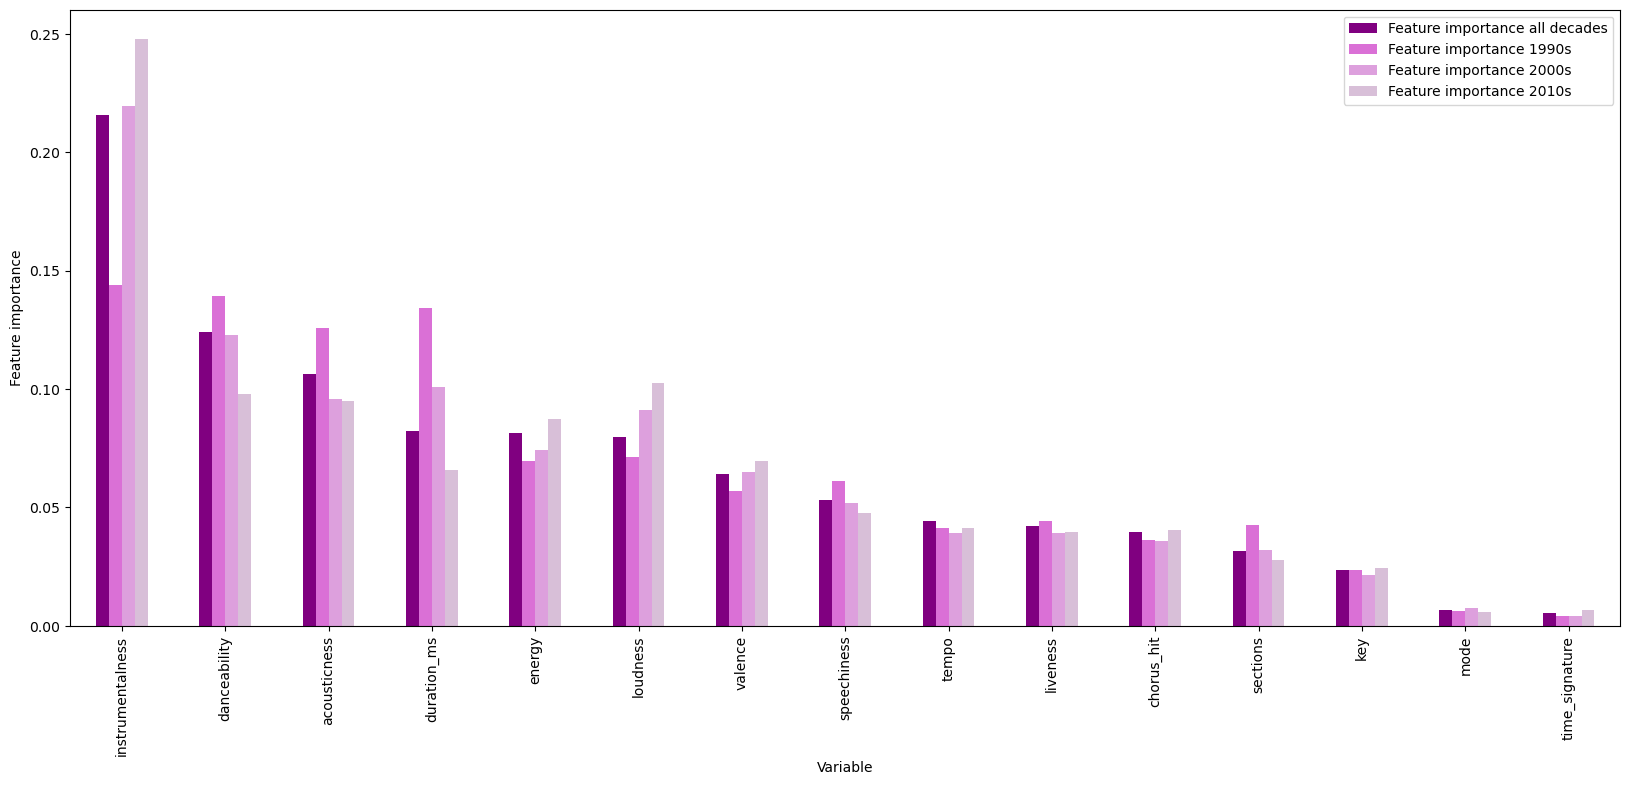

In [43]:
compare_feats_df.plot(kind='bar', color = ('purple','orchid','plum','thistle' ), figsize = (20,8))
plt.ylabel("Feature importance")
plt.show()

Overall the most important predictors of hit and flop songs are their instrumentalness, danceability, acousticness, duration, energy and loudness. However, there has been some fluctuation of these through the decades with some song features being more important in particular decades.